In [ ]:
pip install imbalanced-learn

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import KMeansSMOTE
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN
from imblearn.ensemble import RUSBoostClassifier

In [8]:
data = pd.read_csv('cleanedDataClassOccupation.csv')


In [9]:
X = data.drop(columns = ['client_id', 'target'])
y = data['target']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42, stratify = y)

In [11]:
print('Number of 1 cases:{}'.format(np.count_nonzero(data['target'] == 1)))
print('Number of 0 cases:{}'.format(np.count_nonzero(data['target'] == 0)))
# Rate is about 1:32
print('Number of 1 cases is the training data:{}'.format(np.count_nonzero(y_train == 1)))
print('Number of 0 cases is the training data:{}'.format(np.count_nonzero(y_train == 0)))
print('Number of 1 cases is the test data:{}'.format(np.count_nonzero(y_test == 1)))
print('Number of 0 cases is the test data:{}'.format(np.count_nonzero(y_test == 0)))
# Proportion of 1's and 0's remains the same in the training and test datasets due to the stratification
# This generally improves performance


Number of 1 cases:1913
Number of 0 cases:61784
Number of 1 cases is the training data:1626
Number of 0 cases is the training data:52516
Number of 1 cases is the test data:287
Number of 0 cases is the test data:9268


### K-NN Classifier
Points are classified based on the majority class of the k-nearest neighboring points (measured by some distance)

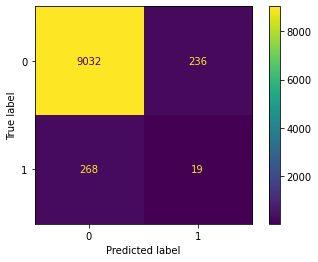

In [ ]:
# Most basic classifier using gridsearch cv to optimize the hyperparameters (number of neighbors)

neigh = KNeighborsClassifier(n_neighbors=2, weights = 'distance')
neigh.fit(X_train, y_train)
predictions = neigh.predict(X_test)
sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_test, predictions)

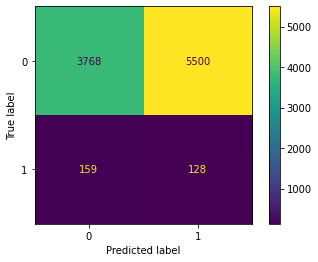

In [ ]:
# Data level solutions:
# Over-sampling the minority class (randomly or informatively)
# Under-sampling the majority class (randomly or informatively)

# UNDERSAMPLING
undersample = NearMiss(version = 3, sampling_strategy=0.66)
X_train_u, y_train_u = undersample.fit_resample(X_train, y_train)

neigh_u = KNeighborsClassifier(n_neighbors=5, weights = 'distance')
neigh_u.fit(X_train_u, y_train_u)
predictions_u = neigh_u.predict(X_test)
sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_test, predictions_u)

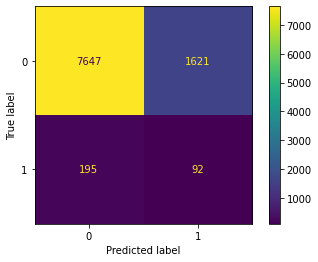

In [ ]:
# Oversampling with SMOTE
oversample = SMOTE(random_state = 1)
X_train_o, y_train_o = oversample.fit_resample(X_train, y_train)


neigh_o = KNeighborsClassifier(n_neighbors=5, weights = 'distance')
neigh_o.fit(X_train_o, y_train_o)
predictions_o = neigh_o.predict(X_test)
sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_test, predictions_o)


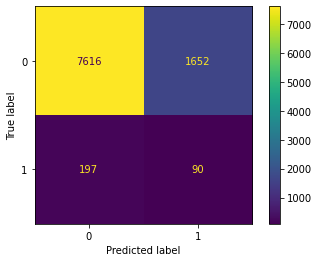

In [ ]:
oversample = ADASYN(random_state = 1)
X_train_o, y_train_o = oversample.fit_resample(X_train, y_train)


neigh_o = KNeighborsClassifier(n_neighbors=5, weights = 'distance')
neigh_o.fit(X_train_o, y_train_o)
predictions_o = neigh_o.predict(X_test)
sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_test, predictions_o)


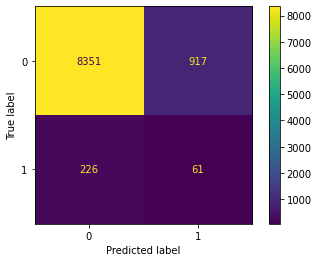

In [ ]:
oversample = BorderlineSMOTE(random_state = 1)
X_train_o, y_train_o = oversample.fit_resample(X_train, y_train)


neigh_o = KNeighborsClassifier(n_neighbors=5, weights = 'distance')
neigh_o.fit(X_train_o, y_train_o)
predictions_o = neigh_o.predict(X_test)
sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_test, predictions_o)


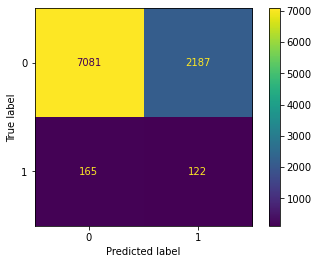

In [12]:
# Takes about 4 mins
combsample = SMOTEENN(random_state = 1)
X_train_c, y_train_c = combsample.fit_resample(X_train, y_train)


neigh_c = KNeighborsClassifier(n_neighbors=5, weights = 'distance')
neigh_c.fit(X_train_c, y_train_c)
predictions_c = neigh_c.predict(X_test)
sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_test, predictions_c)


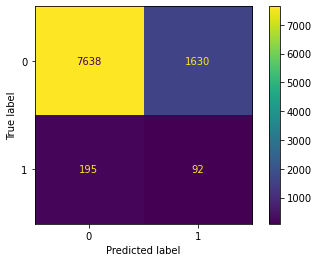

In [ ]:
combsample = SMOTETomek(random_state = 1)
X_train_c, y_train_c = combsample.fit_resample(X_train, y_train)


neigh_c = KNeighborsClassifier(n_neighbors=5, weights = 'distance')
neigh_c.fit(X_train_c, y_train_c)
predictions_c = neigh_c.predict(X_test)
sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_test, predictions_c)
